In [1]:
import sys

sys.path.append('../')

In [2]:
from gpt4tools import *


===================================BUG REPORT===================================
Welcome to bitsandbytes. For bug reports, please submit your error trace to: https://github.com/TimDettmers/bitsandbytes/issues
CUDA SETUP: CUDA runtime path found: /usr/local/cuda-11.5/lib64/libcudart.so
CUDA SETUP: Highest compute capability among GPUs detected: 8.6
CUDA SETUP: Detected CUDA version 115
CUDA SETUP: Loading binary /home/mymusise/pro/stable-diffusion-webui/venv/lib/python3.8/site-packages/bitsandbytes/libbitsandbytes_cuda115.so...


/home/mymusise/pro/stable-diffusion-webui/venv/lib/python3.8/site-packages/bitsandbytes/cuda_setup/main.py:136: UserWarning: WARNING: The following directories listed in your path were found to be non-existent: {PosixPath('/home/mymusise/pro/stable-diffusion-webui/venv/lib/python3.8/site-packages/cv2/../../lib64')}
  warn(msg)


In [7]:
device = 'cuda:0'

text2box = Text2Box(device)
seg = Segmenting(device)
inpaint = ControlNetInpainting(device)

editor = ImageEditing(text2box, seg, inpaint)

Initializing ObjectDetection to cuda:0


/home/mymusise/pro/stable-diffusion-webui/venv/lib/python3.8/site-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3190.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


final text_encoder_type: bert-base-uncased


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias', 'cls.predictions.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


_IncompatibleKeys(missing_keys=[], unexpected_keys=['label_enc.weight'])
Inintializing Segmentation to cuda:0


Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

/home/mymusise/pro/stable-diffusion-webui/venv/lib/python3.8/site-packages/transformers/models/clip/feature_extraction_clip.py:28: FutureWarning: The class CLIPFeatureExtractor is deprecated and will be removed in version 5 of Transformers. Please use CLIPImageProcessor instead.
  warnings.warn(
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


Initializing ImageEditing


In [4]:
from PIL import  Image

def display_image(image_path):
    image = Image.open(image_path)
    w, h = image.size
    return image.resize((int(w/2), int(h/2)), Image.BOX)

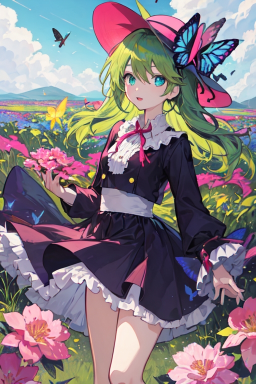

In [9]:
image_path = "../images/20230428-151107.png"

display_image(image_path)

In [11]:
mask_prompt = "butterfly"
replace_prompt = "flower"

edited_image_path = editor.inference_replace_sam(f"{image_path},{mask_prompt},{replace_prompt}")


image_path=../images/20230428-151107.png, to_be_replaced_txt=butterfly


  0%|          | 0/30 [00:00<?, ?it/s]


Processed ImageEditing, Input Image: ../images/20230428-151107.png, Replace butterfly to flower, Output Image: ../images/1f9df37d.png


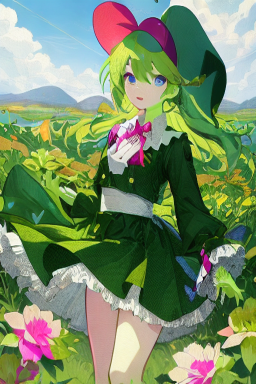

In [12]:
display_image(edited_image_path)